In [67]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [68]:
import numpy as np 
import pandas as pd
import os
import gc
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [144]:
x_min = 0
x_max = 56.72
y_min = -24.5605
y_max = 73.6814
# x_min = 0
# x_max = 119.544
# y_min = 0
# y_max = 138.038
x_len = x_max - x_min
y_len = y_max - y_min


ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

# Set parent directory containing allsimulations to be analyzed 
parentDir = "../analytic_v2/gap46_100/"
allWaterArr = []
# loop over all simulation folders
for simDir in sorted_alphanumeric(os.listdir(parentDir)):
    waterArr = []
    # data is expected to be in a folder titled pressure
    dataDir = parentDir+simDir
    for step in sorted_alphanumeric(os.listdir(dataDir)):
        waterArr.append(dataDir+"/"+step)
    if waterArr:
        allWaterArr.append(waterArr)
    else:
        print("No water array created for: " + dataDir)
print(allWaterArr)

[['../analytic_v2/gap46_100/pressure/pressuredata.55000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.60000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.65000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.70000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.75000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.80000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.85000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.90000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.95000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.100000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.105000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.110000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.115000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.120000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.125000.gz', '../analytic_v2/gap46_100/pressure/pressuredata.130000.gz', '../analytic_v2/gap46_100/pressure/pressuredata

In [145]:
i=0
min_atom_positions = []
max_atom_positions = []
# loop through arrays of file names containing data to be analyzed
for waterArr in allWaterArr:
    if i != 0:
        i+=1
        continue  
    timesteps = []
    waterdfs = []
    print(waterArr[0])  
    for waterFile in waterArr:
        print(waterFile)
        with gzip.open(waterFile) as f:
            f.readline().rstrip()
            timestep = f.readline().rstrip().decode("utf-8") 
        timesteps.append(timestep)
        idf = pd.read_csv(waterFile).iloc[7:,:]
        dfCols = idf.iloc[0,].str.split(' ')[0]
        del dfCols[0:2]
        df = idf.iloc[1:,:]['ITEM: TIMESTEP'].str.split(' ', expand=True)
        df.set_axis(dfCols,axis=1,inplace=True)
        df.reset_index(drop=True, inplace=True)
        df = df.apply(pd.to_numeric)
        min_atom_positions.append(df['z'].min())
        max_atom_positions.append(df['z'].max())
        df = df[df.type != 3]
        waterdfs.append(df)
    i+=1

../analytic_v2/gap46_100/pressure/pressuredata.55000.gz
../analytic_v2/gap46_100/pressure/pressuredata.55000.gz
../analytic_v2/gap46_100/pressure/pressuredata.60000.gz
../analytic_v2/gap46_100/pressure/pressuredata.65000.gz
../analytic_v2/gap46_100/pressure/pressuredata.70000.gz
../analytic_v2/gap46_100/pressure/pressuredata.75000.gz
../analytic_v2/gap46_100/pressure/pressuredata.80000.gz
../analytic_v2/gap46_100/pressure/pressuredata.85000.gz
../analytic_v2/gap46_100/pressure/pressuredata.90000.gz
../analytic_v2/gap46_100/pressure/pressuredata.95000.gz
../analytic_v2/gap46_100/pressure/pressuredata.100000.gz
../analytic_v2/gap46_100/pressure/pressuredata.105000.gz
../analytic_v2/gap46_100/pressure/pressuredata.110000.gz
../analytic_v2/gap46_100/pressure/pressuredata.115000.gz
../analytic_v2/gap46_100/pressure/pressuredata.120000.gz
../analytic_v2/gap46_100/pressure/pressuredata.125000.gz
../analytic_v2/gap46_100/pressure/pressuredata.130000.gz
../analytic_v2/gap46_100/pressure/pressur

../analytic_v2/gap46_100/pressure/pressuredata.770000.gz
../analytic_v2/gap46_100/pressure/pressuredata.775000.gz
../analytic_v2/gap46_100/pressure/pressuredata.780000.gz
../analytic_v2/gap46_100/pressure/pressuredata.785000.gz
../analytic_v2/gap46_100/pressure/pressuredata.790000.gz
../analytic_v2/gap46_100/pressure/pressuredata.795000.gz
../analytic_v2/gap46_100/pressure/pressuredata.800000.gz
../analytic_v2/gap46_100/pressure/pressuredata.805000.gz
../analytic_v2/gap46_100/pressure/pressuredata.810000.gz
../analytic_v2/gap46_100/pressure/pressuredata.815000.gz
../analytic_v2/gap46_100/pressure/pressuredata.820000.gz
../analytic_v2/gap46_100/pressure/pressuredata.825000.gz
../analytic_v2/gap46_100/pressure/pressuredata.830000.gz
../analytic_v2/gap46_100/pressure/pressuredata.835000.gz
../analytic_v2/gap46_100/pressure/pressuredata.840000.gz
../analytic_v2/gap46_100/pressure/pressuredata.845000.gz
../analytic_v2/gap46_100/pressure/pressuredata.850000.gz
../analytic_v2/gap46_100/pressu

../analytic_v2/gap46_100/pressure/pressuredata.1485000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1490000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1495000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1500000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1505000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1510000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1515000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1520000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1525000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1530000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1535000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1540000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1545000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1550000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1555000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1560000.gz
../analytic_v2/gap46_100/pressure/pressuredata.1565000.gz
../analytic_v2

In [155]:
pressureSeries = []
densitySeries = []
countSeries = []
vxSeries = []
vySeries = []
vzSeries = []

gapPressureSeries = []
gapDensitySeries = []
gapCountSeries = []
gapvxSeries = []
gapvySeries = []
gapvzSeries = []

## gap10
# gap_min = 21
# gap_max = 32

## gap46
gap_min = 2
gap_max = 49

gap_len = gap_max - gap_min
nGapBins = (gap_len * 1) + 1

z_min = -296
z_max = 226
z_len = z_max - z_min

nBins = int((z_len * 0.5) + 1)
bin_size = z_len/nBins

min_timestep = 200000
max_timestep = 800000

feedPressures = []
gapPressures = []
permPressures = []

feedCount = []
gapCount = []
permCount = []

feedvxs = []
gapvxs = []
permvxs = []

feedvys = []
gapvys = []
permvys = []

feedvzs = []
gapvzs = []
permvzs = []

i=0
for df in waterdfs:
    if ((int(timesteps[i]) < min_timestep) or (int(timesteps[i]) > max_timestep)):
        i+=1
        continue
    dfMol = pd.DataFrame()

    df['xmass'] = df['mass'] * df['x']
    df['ymass'] = df['mass'] * df['y']
    df['zmass'] = df['mass'] * df['z']
    
    df['vxmass'] = df['mass'] * df['vx']
    df['vymass'] = df['mass'] * df['vy']
    df['vzmass'] = df['mass'] * df['vz']

    # create per molecule dataframe to analyze at finer scale
    # atoms of a molecule are expected to be consecutive

    dfMol['mass'] = df['mass'].groupby(df.index // 3).sum()
    dfMol['xmass'] = df['xmass'].groupby(df.index // 3).sum()
    dfMol['ymass'] = df['ymass'].groupby(df.index // 3).sum()
    dfMol['zmass'] = df['zmass'].groupby(df.index // 3).sum()
    dfMol['vxmass'] = df['vxmass'].groupby(df.index // 3).sum()
    dfMol['vymass'] = df['vymass'].groupby(df.index // 3).sum()
    dfMol['vzmass'] = df['vzmass'].groupby(df.index // 3).sum()
    dfMol['x'] = dfMol['xmass'] / dfMol['mass']
    dfMol['y'] = dfMol['ymass'] / dfMol['mass']
    dfMol['z'] = dfMol['zmass'] / dfMol['mass']
    dfMol['vx'] = dfMol['vxmass'] / dfMol['mass']
    dfMol['vy'] = dfMol['vymass'] / dfMol['mass']
    dfMol['vz'] = dfMol['vzmass'] / dfMol['mass']
    dfMol['stressvol'] = df['v_peratompress'].groupby(df.index // 3).sum()
    dfMol['vol'] = df['c_peratomvol[1]'].groupby(df.index // 3).sum()
    dfMol['press'] = dfMol['stressvol'] / (-3 * dfMol['vol'])
    dfMol['density'] = (dfMol['mass'] / (x_len * y_len * z_len/nBins)) * ang3_to_cm3 / avo_num
    dfMol['pressbin'] = (dfMol['stressvol'] / (-3 * x_len * y_len * z_len/nBins))
    dfMol['bin'] = pd.cut(dfMol['z'], np.linspace(z_min,z_max,nBins),labels=False)
    dfMol['ybin'] = pd.cut(dfMol['y'].loc[(dfMol['z'] > -45) & (dfMol['z'] < 45)], np.linspace(gap_min,gap_max,nGapBins),labels=False)
#     stepDF_mean = dfMol.loc[(max_atom_positions[i]-dfMol['z'] > 5) & (dfMol['z']-min_atom_positions[i] > 5)].groupby(['bin'], dropna=True).mean()
#     stepDF_sum = dfMol.loc[(max_atom_positions[i]-dfMol['z'] > 5) & (dfMol['z']-min_atom_positions[i] > 5)].groupby(['bin'], dropna=True).sum()
    stepDF_mean = dfMol.groupby(['bin'], dropna=True).mean()
    stepDF_sum = dfMol.groupby(['bin'], dropna=True).sum()
    stepDF_sum['bin_count'] = dfMol.groupby(['bin'], dropna=True)['bin'].count() 
    gapDF_mean = dfMol.groupby(['ybin'], dropna=True).mean()
    gapDF_sum = dfMol.groupby(['ybin'], dropna=True).sum()
    gapDF_sum['ybin_count'] = dfMol.groupby(['ybin'], dropna=True)['ybin'].count()
    
    feedPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < -50) & (dfMol['z']-min_atom_positions[i] > 5)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] < -50) & (dfMol['z']-min_atom_positions[i] > 5)].sum()))
    gapPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < 45) & (dfMol['z'] > -45)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] < 45) & (dfMol['z'] > -45)].sum()))
    permPressures.append(dfMol['stressvol'].loc[(dfMol['z'] > 50) & (max_atom_positions[i]-dfMol['z'] > 5)].sum() / (-3 * dfMol['vol'].loc[(dfMol['z'] > 50) & (max_atom_positions[i]-dfMol['z'] > 5)].sum()))
#     feedPressures.append(dfMol['stressvol'].loc[(dfMol['z'] < -50)].sum() / (-3 * x_len * y_len * (-50-min_atom_positions[i])))
#     permPressures.append(dfMol['stressvol'].loc[(dfMol['z'] > 50)].sum() / (-3 * x_len * y_len * (max_atom_positions[i]-50)))
    
    feedCount.append(dfMol['bin'].loc[(dfMol['z'] < -50)].count())
    gapCount.append(dfMol['bin'].loc[(dfMol['z'] < 50) & (dfMol['z'] > -50)].count())
    permCount.append(dfMol['bin'].loc[(dfMol['z'] > 50)].count())
    
    feedvxs.append(dfMol['vx'].loc[(dfMol['z'] < -50) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
    gapvxs.append(dfMol['vx'].loc[(dfMol['z'] < 50) & (dfMol['z'] > -50)].sum())
    permvxs.append(dfMol['vx'].loc[(dfMol['z'] > 50) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

    feedvys.append(dfMol['vy'].loc[(dfMol['z'] < -50) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
    gapvys.append(dfMol['vy'].loc[(dfMol['z'] < 50) & (dfMol['z'] > -50)].sum())
    permvys.append(dfMol['vy'].loc[(dfMol['z'] > 50) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

    feedvzs.append(dfMol['vz'].loc[(dfMol['z'] < -50) & (dfMol['z']-min_atom_positions[i] > 5)].mean())
    gapvzs.append(dfMol['vz'].loc[(dfMol['z'] < 50) & (dfMol['z'] > -50)].sum())
    permvzs.append(dfMol['vz'].loc[(dfMol['z'] > 50) & (max_atom_positions[i]-dfMol['z'] > 5)].mean())

    vxSeries.append(stepDF_mean['vx'].rename(timesteps[i], axis=1))
    vySeries.append(stepDF_mean['vy'].rename(timesteps[i], axis=1))
    vzSeries.append(stepDF_mean['vz'].rename(timesteps[i], axis=1))
    
    pressureSeries.append(stepDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*stepDF_sum['vol'].rename(timesteps[i], axis=1)))
    densitySeries.append((stepDF_sum['mass'].rename(timesteps[i], axis=1)/(stepDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
    countSeries.append(stepDF_sum['bin_count'].rename(timesteps[i], axis=1))
    
    gapCountSeries.append(gapDF_sum['ybin_count'].rename(timesteps[i], axis=1))
    gapPressureSeries.append(gapDF_sum['stressvol'].rename(timesteps[i], axis=1)/(-3*gapDF_sum['vol'].rename(timesteps[i], axis=1)))
    gapDensitySeries.append((gapDF_sum['mass'].rename(timesteps[i], axis=1)/(gapDF_sum['vol'].rename(timesteps[i], axis=1)))* ang3_to_cm3 / avo_num)
    gapvxSeries.append(gapDF_mean['vx'].rename(timesteps[i], axis=1))
    gapvySeries.append(gapDF_mean['vy'].rename(timesteps[i], axis=1))
    gapvzSeries.append(gapDF_mean['vz'].rename(timesteps[i], axis=1))
    i += 1

pressureSeriesDF = pd.concat(pressureSeries, axis=1, ignore_index=False)
densitySeriesDF = pd.concat(densitySeries,axis=1, ignore_index=False)
countSeriesDF = pd.concat(countSeries, axis=1, ignore_index=False)
vxSeriesDF = pd.concat(vxSeries, axis=1, ignore_index=False)
vySeriesDF = pd.concat(vySeries, axis=1, ignore_index=False)                    
vzSeriesDF = pd.concat(vzSeries, axis=1, ignore_index=False)

gapCountSeriesDF = pd.concat(gapCountSeries, axis=1, ignore_index=False)
gapPressureSeriesDF = pd.concat(gapPressureSeries, axis=1, ignore_index=False)
gapDensitySeriesDF = pd.concat(gapDensitySeries,axis=1, ignore_index=False)
gapvxSeriesDF = pd.concat(gapvxSeries, axis=1, ignore_index=False)
gapvySeriesDF = pd.concat(gapvySeries, axis=1, ignore_index=False)                    
gapvzSeriesDF = pd.concat(gapvzSeries, axis=1, ignore_index=False)
                       
                       
AVGpressureSeriesDF = pd.DataFrame()
AVGdensitySeriesDF = pd.DataFrame()
AVGvxSeriesDF = pd.DataFrame()
AVGvySeriesDF = pd.DataFrame()
AVGvzSeriesDF = pd.DataFrame()
AVGcountSeriesDF = pd.DataFrame()

AVGgapPressureSeriesDF = pd.DataFrame()
AVGgapDensitySeriesDF = pd.DataFrame()
AVGgapCountSeriesDF = pd.DataFrame()

AVGgapvxSeriesDF = pd.DataFrame()
AVGgapvySeriesDF = pd.DataFrame()
AVGgapvzSeriesDF = pd.DataFrame()            

AVGpressureSeriesDF['mean'] = pressureSeriesDF.mean(axis=1)
AVGpressureSeriesDF['stdev'] = pressureSeriesDF.std(axis=1)

AVGdensitySeriesDF['mean'] = densitySeriesDF.mean(axis=1)
AVGdensitySeriesDF['stdev'] = densitySeriesDF.std(axis=1)

AVGcountSeriesDF['mean'] = countSeriesDF.mean(axis=1)
AVGcountSeriesDF['stdev'] = countSeriesDF.std(axis=1)

AVGvxSeriesDF['mean'] = vxSeriesDF.mean(axis=1)
AVGvxSeriesDF['stdev'] = vxSeriesDF.std(axis=1)
AVGvySeriesDF['mean'] = vySeriesDF.mean(axis=1)
AVGvySeriesDF['stdev'] = vySeriesDF.std(axis=1)
AVGvzSeriesDF['mean'] = vzSeriesDF.mean(axis=1)
AVGvzSeriesDF['stdev'] = vzSeriesDF.std(axis=1)
                       
AVGgapCountSeriesDF['mean'] = gapCountSeriesDF.mean(axis=1)
AVGgapCountSeriesDF['stdev'] = gapCountSeriesDF.std(axis=1)
AVGgapPressureSeriesDF['mean'] = gapPressureSeriesDF.mean(axis=1)
AVGgapPressureSeriesDF['stdev'] = gapPressureSeriesDF.std(axis=1)
AVGgapDensitySeriesDF['mean'] = gapDensitySeriesDF.mean(axis=1)
AVGgapDensitySeriesDF['stdev'] = gapDensitySeriesDF.std(axis=1)
                       
AVGgapvxSeriesDF['mean'] = gapvxSeriesDF.mean(axis=1)
AVGgapvxSeriesDF['stdev'] = gapvxSeriesDF.std(axis=1)
AVGgapvySeriesDF['mean'] = gapvySeriesDF.mean(axis=1)
AVGgapvySeriesDF['stdev'] = gapvySeriesDF.std(axis=1)
AVGgapvzSeriesDF['mean'] = gapvzSeriesDF.mean(axis=1)
AVGgapvzSeriesDF['stdev'] = gapvzSeriesDF.std(axis=1)

pressureSeriesDF.index.names = ['Distance in z (Å)']
AVGpressureSeriesDF.index.names = ['Distance in z (Å)']

densitySeriesDF.index.names = ['Distance in z (Å)']
AVGdensitySeriesDF.index.names = ['Distance in z (Å)']
                       
vxSeriesDF.index.names = ['Distance in z (Å)']
AVGvxSeriesDF.index.names = ['Distance in z (Å)']                      
vySeriesDF.index.names = ['Distance in z (Å)']
AVGvySeriesDF.index.names = ['Distance in z (Å)']        
vzSeriesDF.index.names = ['Distance in z (Å)']
AVGvzSeriesDF.index.names = ['Distance in z (Å)']                      

gapCountSeriesDF.index.names = ['Distance in y (Å)']
AVGgapCountSeriesDF.index.names = ['Distance in y (Å)']
gapPressureSeriesDF.index.names = ['Distance in y (Å)']
AVGgapPressureSeriesDF.index.names = ['Distance in y (Å)']
gapDensitySeriesDF.index.names = ['Distance in y (Å)']
AVGgapDensitySeriesDF.index.names = ['Distance in y (Å)']

gapvxSeriesDF.index.names = ['Distance in y (Å)']
AVGgapvxSeriesDF.index.names = ['Distance in y (Å)']     
gapvySeriesDF.index.names = ['Distance in y (Å)']
AVGgapvySeriesDF.index.names = ['Distance in y (Å)']    
gapvzSeriesDF.index.names = ['Distance in y (Å)']
AVGgapvzSeriesDF.index.names = ['Distance in y (Å)']    
                       
                       
pressureSeriesDF.set_index(pressureSeriesDF.index*bin_size,inplace=True)
AVGpressureSeriesDF.set_index(AVGpressureSeriesDF.index*bin_size,inplace=True)
densitySeriesDF.set_index(densitySeriesDF.index*bin_size,inplace=True)
AVGdensitySeriesDF.set_index(AVGdensitySeriesDF.index*bin_size,inplace=True)

countSeriesDF.set_index(countSeriesDF.index*bin_size,inplace=True)
AVGcountSeriesDF.set_index(AVGcountSeriesDF.index*bin_size,inplace=True)
                       
vxSeriesDF.set_index(vxSeriesDF.index*bin_size,inplace=True)
AVGvxSeriesDF.set_index(AVGvxSeriesDF.index*bin_size,inplace=True)
vySeriesDF.set_index(vySeriesDF.index*bin_size,inplace=True)
AVGvySeriesDF.set_index(AVGvySeriesDF.index*bin_size,inplace=True)
vzSeriesDF.set_index(vzSeriesDF.index*bin_size,inplace=True)
AVGvzSeriesDF.set_index(AVGvzSeriesDF.index*bin_size,inplace=True)

In [1]:
pressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGpressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/46gap_old_pressure_avg.jpg',bbox_inches='tight')


print(pressureSeriesDF.mean().mean())
print(pressureSeriesDF.mean().std())
print(AVGpressureSeriesDF.mean())

NameError: name 'pressureSeriesDF' is not defined

0.9581654054730723
0.0009373112608324202
mean     0.947802
stdev    0.017516
dtype: float64


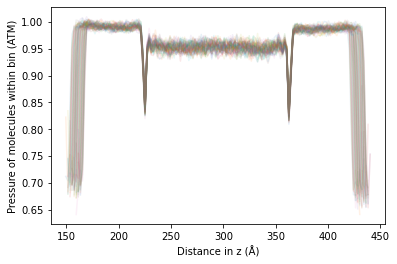

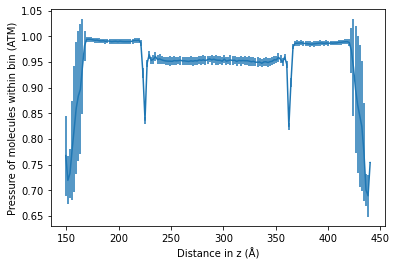

In [136]:
densitySeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGdensitySeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/7gap_pressure_avg.jpg',bbox_inches='tight')


print(densitySeriesDF.mean().mean())
print(densitySeriesDF.mean().std())
print(AVGdensitySeriesDF.mean())

8.114374666512101e-07
2.889784170721491e-05
mean    -0.000002
stdev    0.000405
dtype: float64


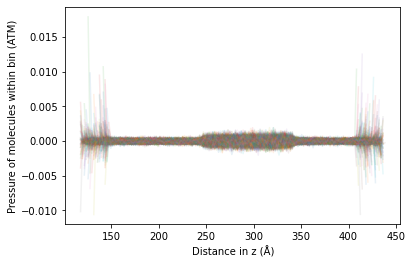

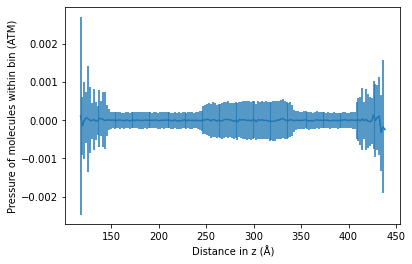

In [143]:
vxSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGvxSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(vxSeriesDF.mean().mean())
print(vxSeriesDF.mean().std())
print(AVGvxSeriesDF.mean())

2.3873912101072323e-05
2.6971681722364147e-05
mean     0.000023
stdev    0.000337
dtype: float64


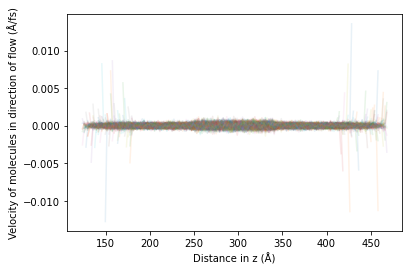

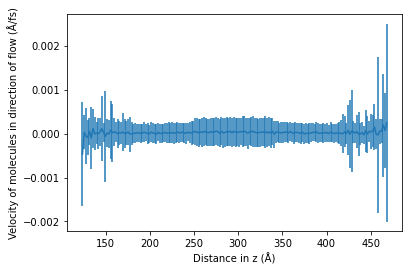

In [148]:
vzSeriesDF.plot(alpha=0.1, legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGvzSeriesDF.plot(yerr='stdev',legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
plt.savefig('./plots/46gap_old_vz_avg.jpg',bbox_inches='tight')


print(vzSeriesDF.mean().mean())
print(vzSeriesDF.mean().std())
print(AVGvzSeriesDF.mean())

-679.2161541668042
1079.0215666240026
mean     -679.014105
stdev    2994.397268
dtype: float64


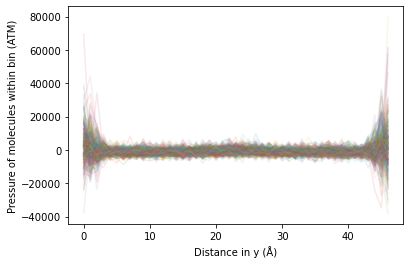

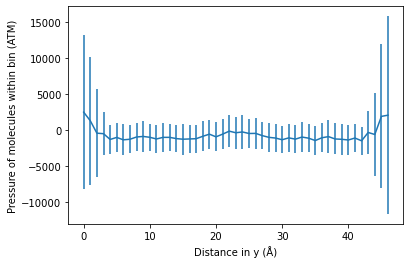

In [149]:
gapPressureSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGgapPressureSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
plt.savefig('./plots/46gap_old_gap_pressure_avg.jpg',bbox_inches='tight')
print(gapPressureSeriesDF.mean().mean())
print(gapPressureSeriesDF.mean().std())
print(AVGgapPressureSeriesDF.mean())

-679.2161541668042
1079.0215666240026
mean     -679.014105
stdev    2994.397268
dtype: float64


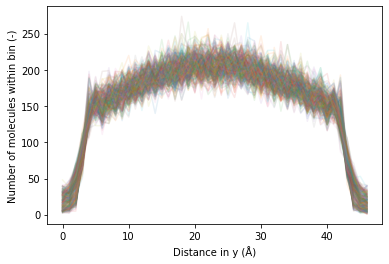

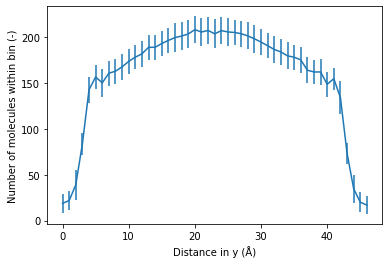

In [150]:
gapCountSeriesDF.plot(alpha=0.1, legend=False, ylabel='Number of molecules within bin (-)')
# plt.savefig('./plots/tube_counts_all_ts.jpg',bbox_inches='tight')
AVGgapCountSeriesDF.plot(yerr='stdev', legend=False, ylabel='Number of molecules within bin (-)')
plt.savefig('./plots/46gap_old_gap_count_avg.jpg',bbox_inches='tight')
print(gapPressureSeriesDF.mean().mean())
print(gapPressureSeriesDF.mean().std())
print(AVGgapPressureSeriesDF.mean())

-1.909456740740533e-06
0.00010769097282611306
mean    -0.000002
stdev    0.000508
dtype: float64


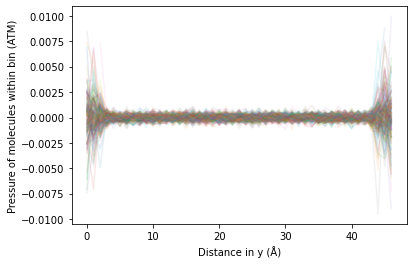

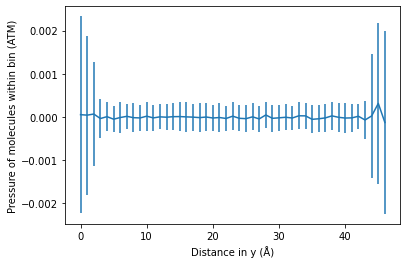

In [21]:
gapvxSeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGgapvxSeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(gapvxSeriesDF.mean().mean())
print(gapvxSeriesDF.mean().std())
print(AVGgapvxSeriesDF.mean())

-3.214686174867024e-06
9.251388472069255e-05
mean    -0.000003
stdev    0.000516
dtype: float64


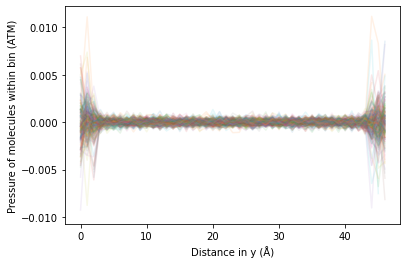

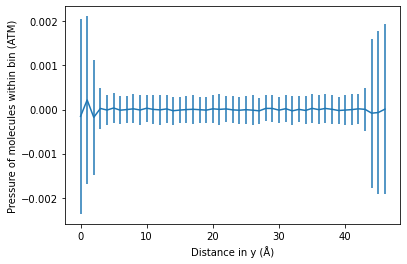

In [22]:
gapvySeriesDF.plot(alpha=0.1, legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGgapvySeriesDF.plot(yerr='stdev',legend=False, ylabel='Pressure of molecules within bin (ATM)')
# plt.savefig('./plots/pressure_avg.jpg',bbox_inches='tight')


print(gapvySeriesDF.mean().mean())
print(gapvySeriesDF.mean().std())
print(AVGgapvySeriesDF.mean())

3.1673260292345464e-05
7.486044469373347e-05
mean     0.000032
stdev    0.000428
dtype: float64


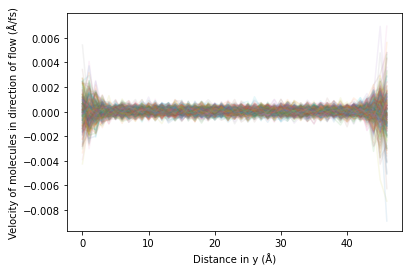

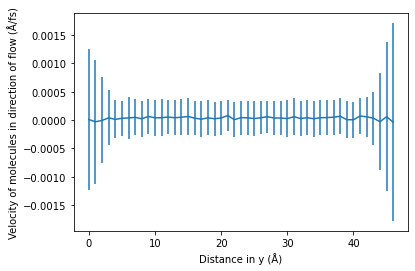

In [151]:
gapvzSeriesDF.plot(alpha=0.1, legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
# plt.savefig('./plots/pressure_all_ts.jpg',bbox_inches='tight')
AVGgapvzSeriesDF.plot(yerr='stdev',legend=False, ylabel='Velocity of molecules in direction of flow (Å/fs)')
plt.savefig('./plots/46gap_old_gap_vz_avg.jpg',bbox_inches='tight')


print(gapvzSeriesDF.mean().mean())
print(gapvzSeriesDF.mean().std())
print(AVGgapvzSeriesDF.mean())

In [2]:
pfeeds = np.array(feedPressures)
pgaps = np.array(gapPressures)
pperms = np.array(permPressures)

pfeedavg = np.mean(pfeeds)
pfeedstd = np.std(pfeeds)
pgapavg = np.mean(pgaps)
pgapstd = np.std(pgaps)
ppermavg = np.mean(pperms)
ppermstd = np.std(pperms)

print("feed")
print(pfeedavg,pfeedstd)
print("gap")
print(pgapavg,pgapstd)
print("perm")
print(ppermavg,ppermstd)

NameError: name 'np' is not defined

In [153]:
vxfeeds = np.array(feedvxs)
vxgaps = np.array(gapvxs)
vxperms = np.array(permvxs)

vxfeedavg = np.mean(vxfeeds)
vxfeedstd = np.std(vxfeeds)
vxgapavg = np.mean(vxgaps)
vxgapstd = np.std(vxgaps)
vxpermavg = np.mean(vxperms)
vxpermstd = np.std(vxperms)

vyfeeds = np.array(feedvys)
vygaps = np.array(gapvys)
vyperms = np.array(permvys)

vyfeedavg = np.mean(vyfeeds)
vyfeedstd = np.std(vyfeeds)
vygapavg = np.mean(vygaps)
vygapstd = np.std(vygaps)
vypermavg = np.mean(vyperms)
vypermstd = np.std(vyperms)

vzfeeds = np.array(feedvzs)
vzgaps = np.array(gapvzs)
vzperms = np.array(permvzs)

vzfeedavg = np.mean(vzfeeds)
vzfeedstd = np.std(vzfeeds)
vzgapavg = np.mean(vzgaps)
vzgapstd = np.std(vzgaps)
vzpermavg = np.mean(vzperms)
vzpermstd = np.std(vzperms)

print("Vx")
print(vxfeedavg,vxfeedstd)
print(vxgapavg,vxgapstd)
print(vxpermavg,vxpermstd)

print("Vy")
print(vyfeedavg,vyfeedstd)
print(vygapavg,vygapstd)
print(vypermavg,vypermstd)

print("Vz")
print(vzfeedavg,vzfeedstd)
print(vzgapavg,vzgapstd)
print(vzpermavg,vzpermstd)

Vx
-7.268139313447873e-07 2.3860230062534895e-05
-0.014155039695714928 0.36549554279311924
-5.475647131127902e-07 2.3733372506964217e-05
Vy
-1.0390172770345312e-06 2.6847687602962658e-05
-0.0206399634653791 0.41076416925043996
2.371325116367177e-06 2.718347905364623e-05
Vz
1.561966173840345e-05 3.4997034348706e-05
0.293731539644382 0.38650138814236623
1.9508301480560785e-05 3.277317172213333e-05


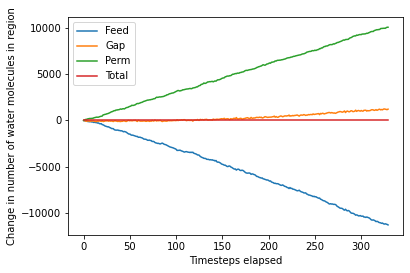

In [154]:
countfeeds = np.array(feedCount)
countgaps = np.array(gapCount)
countperms = np.array(permCount)

countfeeds-=countfeeds[0]
countgaps-=countgaps[0]
countperms-=countperms[0]
counttotal=countfeeds+countgaps+countperms

fig,ax = plt.subplots()
x = np.arange(0,len(countfeeds))
ax.plot(x,countfeeds,label='Feed')
ax.plot(x,countgaps,label='Gap')
ax.plot(x,countperms,label='Perm')
ax.plot(x,counttotal,label='Total')
ax.legend()
ax.set_ylabel('Change in number of water molecules in region')
ax.set_xlabel('Timesteps elapsed')
plt.savefig('./plots/46gap_old_counts.jpg',bbox_inches='tight')